## **DATA SCIENCE CHALLENGE - MERCADO LIBRE**

Autor= Lorena Aldasalo

# **1. Instalamos los requerimientos**

In [1]:
!pip install pycaret

# **2. Importamos las librerías a utilizar**

In [2]:
import requests as rq
import pandas as pd
import numpy as np
import plotly.express as px

Se utilizó "PyCaret" por que es una buena librería para un modelado Quick&Dirty, pero para un modelo maduro es necesario acudir a las librería originales.

In [3]:
from pycaret.regression import *

# **3 . Construcción del dataset**

In [4]:
def busqueda(text, type_search="q", n=50):
    result = pd.DataFrame()
    for i in range(n//50+1):
        params = {type_search:text, "offset":i*50, "limit":min(50, n-i*50)}
        response = rq.get("https://api.mercadolibre.com/sites/MLA/search", params=params)
        if len(response.json()["results"]) > 0:
            tmp = pd.json_normalize(response.json()["results"])
            tmp["query"] = text
            result = result.append(tmp)
        else:
            break
    return result

In [5]:
#Selecciono 1000 Televisores de la lista
bm = busqueda("tv 4k",n=1000)

In [6]:
#Se construye la variable "zona" y luego se seleccionan un conjunto de variables a utilizar en los modelos
conditionlist = [(bm['address.state_name'] == 'Capital Federal'), bm['address.state_name'] == 'Buenos Aires'] 
choicelist = ['Capital Federal','Buenos Aires']
bm['zona'] = np.select(conditionlist, choicelist, default='OTHERS')

dataset = bm[['sold_quantity','price','seller.seller_reputation.transactions.total','seller.seller_reputation.transactions.completed','installments.amount','zona','shipping.mode','shipping.logistic_type']]

# **4. Ejecución de los modelos y evaluación de performance**

Se construyen distintos modelos con la finalidad de predecir cuantas ventas logrará un vendedor teniendo en cuenta las variables analizadas en el ejercicio 1

# 4.1 Modelo 1

In [7]:
reg1 = setup(dataset, target = 'sold_quantity', transformation=True, transformation_method="quantile", silent=True )

,Description,Value
0,session_id,1602
1,Target,sold_quantity
2,Original Data,"(993, 8)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(695, 14)"


In [8]:
#Medidas de performance de los modelos
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,47.5017,105246.0046,248.1031,0.0318,1.5771,2.1783,0.016
huber,Huber Regressor,46.1214,105213.2234,248.3160,0.0245,1.4527,1.2267,0.030
en,Elastic Net,73.7615,101323.1381,248.0339,-0.2115,2.6295,14.9900,0.020
llar,Lasso Least Angle Regression,71.6600,102242.8927,255.1016,-0.5775,2.5067,12.6147,0.016
omp,Orthogonal Matching Pursuit,71.1962,104733.1477,263.4323,-0.8778,2.4987,11.1792,0.018
br,Bayesian Ridge,86.0211,101724.8304,261.3207,-1.1326,2.7555,17.8032,0.018
lasso,Lasso Regression,85.8311,101416.1158,264.7590,-1.4164,2.7192,17.1428,0.020
ridge,Ridge Regression,88.1840,101107.9854,266.0365,-1.5200,2.7519,17.5686,0.018
lar,Least Angle Regression,89.1642,101205.6748,266.8825,-1.5784,2.7744,17.6712,0.020
lr,Linear Regression,88.4186,101271.9350,266.9451,-1.5786,2.7496,17.5011,0.608


En la tabla anterior se comparan los mejores modelos en base a las distintas medidas de performance (MAE, MSE, RMSE, R2, etc). 

Se puede tomar la decisión de elección de un modelo en base a una medida de performance o un conjunto de ellas

Por ejemplo si decidimos cual seria el mejor modelo teniendo en cuenta el MAE (error cuadrático medio) se observa que "huber" es el que posee el MAE más bajo.



In [9]:
#A continuar se genera un modelo "lightgmb" a modo de ejemplo
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.2150,7151.3255,84.5655,-3.4319,2.0561,13.8450
1,69.6704,50101.2924,223.8332,-15.2803,1.8567,8.9718
2,44.4101,9453.1411,97.2273,0.2355,1.7226,9.5580
3,134.3054,526074.2089,725.3097,0.1138,1.8216,20.3835
4,72.7745,39501.5654,198.7500,-3.8637,2.0569,8.1655
5,36.2694,6077.1071,77.9558,0.7411,1.7284,5.2604
6,51.9498,29273.9049,171.0962,0.6058,1.9032,8.5304
7,105.3088,288315.5088,536.9502,0.0839,1.8324,7.9255
8,58.1148,13014.5226,114.0812,-0.3574,2.0911,15.0887
9,37.5994,9260.5418,96.2317,-4.7839,1.6204,9.3405


En la tabla anterior se observa que el "mean" del MAE es bastante alto (66.1390)

In [10]:
#Optimización del modelo seleccionado
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27.3491,1902.9663,43.6230,-0.1793,2.0312,6.9030
1,51.6898,17904.7494,133.8086,-4.8181,2.1792,7.2010
2,35.6987,5269.4603,72.5910,0.5738,1.9542,6.1126
3,115.6081,448059.5832,669.3725,0.2453,2.0020,7.0727
4,50.2730,23197.8141,152.3083,-1.8563,1.9863,5.1113
5,46.7584,12472.4874,111.6803,0.4686,2.1284,4.4803
6,96.6234,203314.6451,450.9043,-1.7376,2.1045,8.1284
7,96.2676,291938.3992,540.3132,0.0723,2.0032,5.9117
8,44.2854,8843.1930,94.0383,0.0777,2.0676,5.3391
9,22.3441,1366.6071,36.9676,0.1464,1.9277,7.2719


Con "tune_model" optimizamos el modelo anterior y observamos el el MAE se reduce 11 puntos (de 66 a 55)

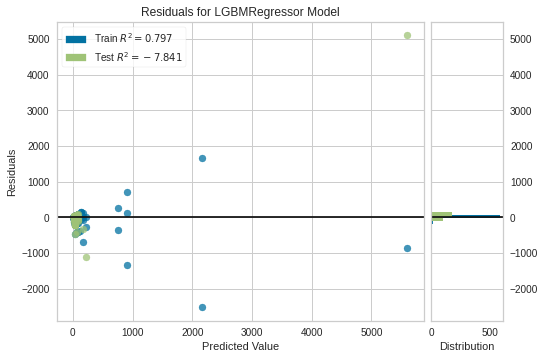

In [11]:
plot_model(tuned_lightgbm)

En el gráfico anterior se observa la presencia de algunos "outliers" que nos están dando como resultado un modelo poco performante.

# 4.2 Modelo 2:

Igual que el Modelo 1 pero quitando outliers

In [12]:
reg2 = setup(dataset, target = 'sold_quantity', transformation=True, transformation_method="quantile", remove_outliers=True, silent=True )


,Description,Value
0,session_id,4968
1,Target,sold_quantity
2,Original Data,"(993, 8)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(317, 13)"


In [13]:
best_model = compare_models(fold=5, sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,21.6395,4.985212e+03,64.6385,-0.0638,1.3401,0.9076,0.026
par,Passive Aggressive Regressor,22.9462,4.850525e+03,63.9249,-0.0466,1.4930,1.7822,0.018
knn,K Neighbors Regressor,25.1446,3.682344e+03,56.4589,0.1524,1.4544,4.5174,0.080
rf,Random Forest Regressor,26.2298,3.654773e+03,56.8914,0.1032,1.4618,4.7173,0.520
et,Extra Trees Regressor,26.3501,4.164365e+03,61.3240,-0.0543,1.4400,3.4440,0.468
lightgbm,Light Gradient Boosting Machine,27.1073,3.846666e+03,58.5959,0.0336,1.6316,4.9477,0.034
gbr,Gradient Boosting Regressor,27.3335,4.070820e+03,60.0908,0.0193,1.4793,4.6596,0.066
dt,Decision Tree Regressor,29.4245,5.709581e+03,71.8817,-0.5110,1.4591,6.1220,0.020
en,Elastic Net,30.5620,4.313154e+03,60.3068,0.0664,2.0117,6.9606,0.018
br,Bayesian Ridge,31.4964,4.317952e+03,60.7407,0.0374,2.0294,7.1843,0.016


In [14]:
# Nos quedamos con el modelo "huber" ya que es el que posee menor MAE y realizamos una optimización del mismo.
huber = create_model('huber')
tuned_huber = tune_model(huber, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.6737,1304.2440,36.1143,-0.0066,1.0491,0.6694
1,13.9362,2040.3589,45.1703,-0.0512,1.1966,0.8487
2,31.8750,9511.2449,97.5256,-0.0958,1.5248,0.6697
3,44.6153,16069.4171,126.7652,-0.1063,1.6578,1.0528
4,15.3438,1433.8642,37.8664,-0.1092,1.2937,0.7284
5,35.1403,11501.9083,107.2470,-0.0931,1.5316,0.6522
6,13.7243,2066.0628,45.4540,-0.0367,1.1289,0.6939
7,20.0828,2522.5721,50.2252,-0.1157,1.4548,0.9912
8,19.0159,2805.9898,52.9716,-0.0746,1.4246,0.8958
9,10.9944,560.0138,23.6646,-0.0259,1.1328,1.2722


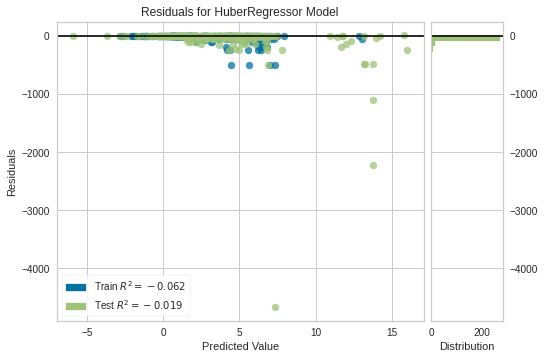

In [15]:
plot_model(tuned_huber)

Todavía vemos un outlier en el train. A fines prácticos lo vamos a dejar, ya que la idea es que la modelización sea lo más automática posible.

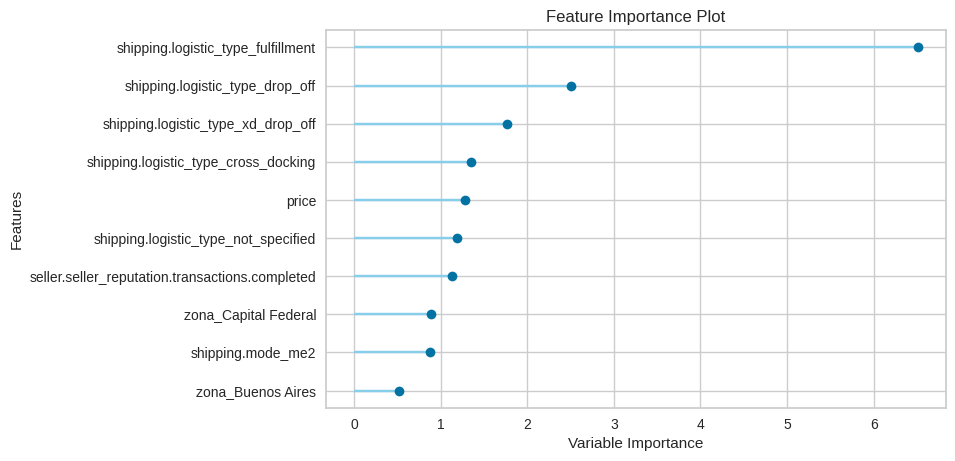

In [16]:
#Importancia de variables
plot_model(tuned_huber, plot = 'feature')

Se observa que la variable con mayor importancia es la categoria "fulfillment" de la variable "shipping.logistic.type". Luego le sigue la categoria "me2" de la variable "shipping.mode" y en tercer lugar la zona de Capital Federal

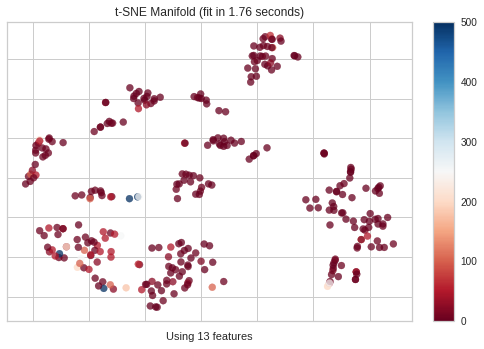

In [17]:
plot_model(tuned_huber, plot="manifold")

En el gráfico anterior se observa la presencia de distintos "clusters" teniendo en cuenta las variables seleccionadas para modelar

# **5. Generador de modelos automático:**

En base al ensayo anterior se puede hacer un generador de modelos en función de una búsqueda determinada.

In [18]:
def generar_modelo(query, nombre_modelo):
  bm = busqueda(query,n=1000)
  conditionlist = [(bm['address.state_name'] == 'Capital Federal'), bm['address.state_name'] == 'Buenos Aires'] 
  choicelist = ['Capital Federal','Buenos Aires']
  bm['zona'] = np.select(conditionlist, choicelist, default='OTHERS')

  dataset = bm[['sold_quantity','price','seller.seller_reputation.transactions.total','seller.seller_reputation.transactions.completed','installments.amount','zona','shipping.mode','shipping.logistic_type']]
  reg = setup(dataset, target = 'sold_quantity', numeric_features= ['price','seller.seller_reputation.transactions.total','seller.seller_reputation.transactions.completed','installments.amount'], transformation=True, transformation_method="quantile", remove_outliers=True, silent=True)
  huber = create_model('huber')
  tuned_huber = tune_model(huber, n_iter=50, optimize = 'MAE')
  save_model(tuned_huber, nombre_modelo)

def estimar_cantidad(modelo, price, seller_reputation,seller_transactions,installments, state_name, shipping_mode, shipping_logistic_type):
  d = {"price":price
      ,"seller.seller_reputation.transactions.total":[seller_reputation]
      ,"seller.seller_reputation.transactions.completed":[seller_transactions]
      ,"installments.amount":[installments]
      , "shipping.mode":[shipping_mode]
      , "shipping.logistic_type":[shipping_logistic_type]}
  if state_name not in  ["Buenos Aires", "Capital Federal"]:
    d["zona"] = ['OTHERS']
  else:
    d["zona"] = [state_name]
  m = load_model(modelo)
  return predict_model(m, data=pd.DataFrame.from_dict(d))["Label"]


Por ejemplo a continuación generamos un modelo que prediga las ventas de "vasos"

In [19]:
generar_modelo("vasos","vasos_model")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,119.6800,38597.6694,196.4629,-0.2688,-0.0,2.0299
1,70.3736,16082.3916,126.8164,-0.0707,-0.0,2.3648
2,76.8763,16233.5189,127.4108,-0.0760,-0.0,2.5350
3,68.9181,14936.4507,122.2148,-0.0109,-0.0,4.5900
4,99.2937,30745.4184,175.3437,-0.1625,-0.0,1.7577
5,72.8754,15141.2757,123.0499,-0.0160,-0.0,2.7351
6,110.2621,33567.8949,183.2154,-0.2773,-0.0,1.8454
7,144.1496,43203.8322,207.8553,-0.4078,-0.0,3.2895
8,101.3131,29476.2387,171.6865,-0.1671,-0.0,2.8043
9,112.7594,31539.5255,177.5937,-0.3528,-0.0,2.0273


Transformation Pipeline and Model Successfully Saved


A continuación calculamos cuales serían las ventas de un vendedor, de acuerdo a sus variables

In [20]:
estimar_cantidad("vasos_model", 164, 1000, 1000, 226, "Capital Federal", "me2", "cross_docking")

Transformation Pipeline and Model Successfully Loaded


0    62.086726
Name: Label, dtype: float64

# **6. Conclusiones:**

Se observa claramente que el modelo obtenido no es el mejor para ser utilizado. Ello se debe a los siguientes factores:
1. Cantidad de registros para modelar: Se trabajo solamente con 1000 datos para entrenar y validar los distintos modelos. Debido al volúmen de transacciones que posee Mercado Libre, deberíamos seleccionar una muestra representativa para realizar la modelización.
2. Definición del universo: Aplicando simplemente el filtro "tv 4k" observamos que hay categorías que no corresponden a ventas de televisores (como ser cables, controles remotos, etc.). Por tal motivo es fundamental una mayor exploración de los filtros a aplicar para seleccionar el dataset objetivo.
3. Es necesario explorar la forma de detectar outliers y eliminarlos automáticamente.
4. En el problema no está definida la temporalidad de las ventas. No es lo mismo un vendedor que tiene publicado el articulo hace 1 año que otro que lo tiene hace dos semanas.
